In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from pydataset import data

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

# use functions form wrangle_zillow to help read in mall customer data
import wrangle_zillow as w
import cluster_functions as cf

from env import host, user, password
import os

np.random.seed(42)


# Clustering with the Iris Dataset

In [2]:
df = data('iris')

In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.columns = columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Perform clustering on the iris dataset
- a. Choose features other than the ones used in the lesson.
- b. Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.

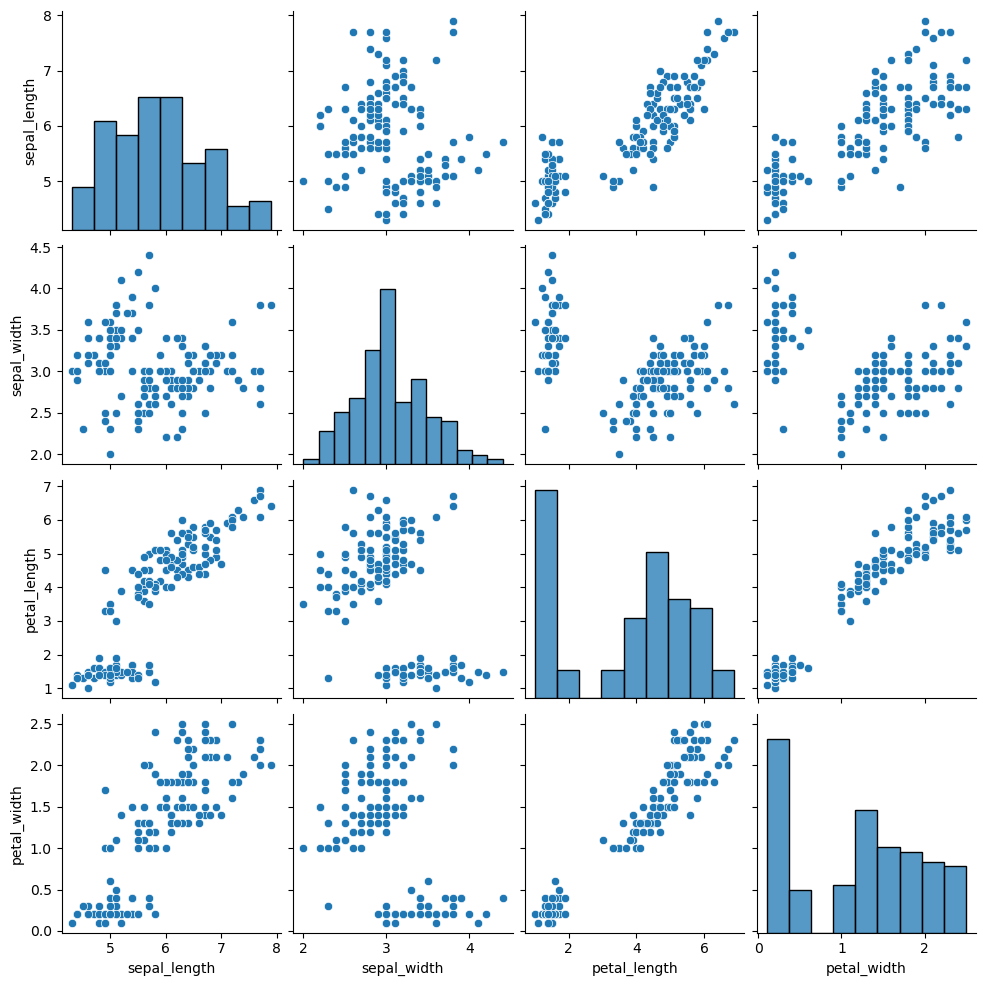

In [4]:
# quick look at data (no hue; just want to see if i can see any groupings)
sns.pairplot(df)
plt.show()

In [5]:
# starting with two features per exercise instructions; these two seemed like there are at least 2 clusters
X = df[['petal_width', 'petal_length']]
X.head()

,petal_width,petal_length
1,0.2,1.4
2,0.2,1.4
3,0.2,1.3
4,0.2,1.5
5,0.2,1.4


In [6]:
# make/fit/use the thing (I'm starting with n_clusters = 3 due to domain knowledge)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
# add cluster predictions to X and make it a string for help with visualizing
X['clusters'] = clusters
X.clusters = X.clusters.astype(str)
X.head()

,petal_width,petal_length,clusters
1,0.2,1.4,1
2,0.2,1.4,1
3,0.2,1.3,1
4,0.2,1.5,1
5,0.2,1.4,1


In [8]:
# exploring the attributes of the KMeans model I created
kmeans.cluster_centers_

array([[2.0375    , 5.59583333],
       [0.246     , 1.462     ],
       [1.34230769, 4.26923077]])

In [9]:
# put the above into a dataframe for fun / readability
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns[:2])
centroids

,petal_width,petal_length
0,2.037500,5.595833
1,0.246000,1.462000
2,1.342308,4.269231


In [10]:
# one more note, the cluster_centers_ are the same thing as if we asked for the mean of each 
# feature grouped by the clusters
X.groupby('clusters')['petal_width', 'petal_length'].mean()

,petal_width,petal_length
clusters,,
0,2.037500,5.595833
1,0.246000,1.462000
2,1.342308,4.269231


In [11]:
# note for me: labels_ is the same as X.predict; however, X.predict can be used on unseen data (validate/test)
# whereas labels_ is only on the train data
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
# lower inertia is good... up to a point. Elbow method next
kmeans.inertia_

31.371358974358973

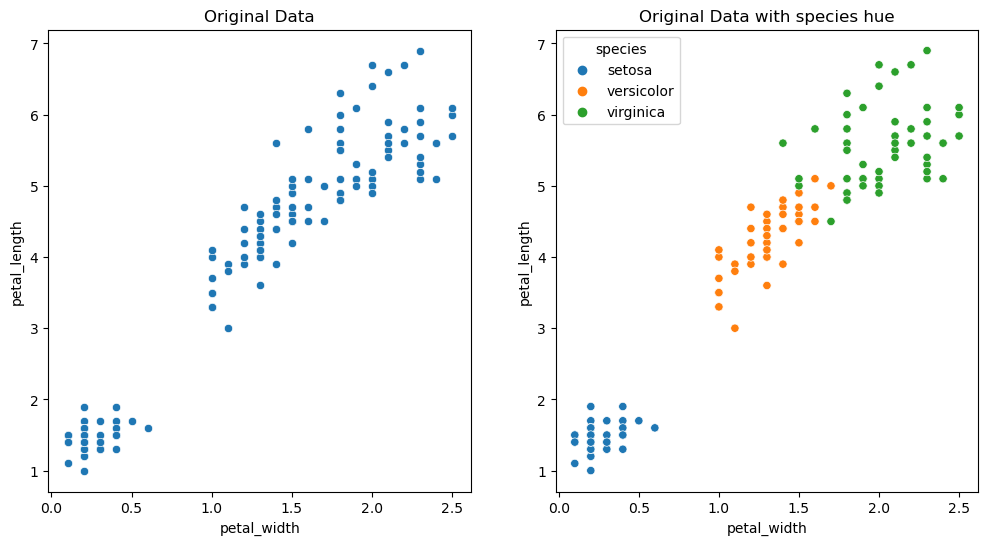

In [13]:
# visualize original data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df.petal_width, y=df.petal_length)
plt.title('Original Data')

plt.subplot(1,2,2)
sns.scatterplot(x=df.petal_width, y=df.petal_length, hue=df.species)
plt.title('Original Data with species hue')
plt.show()

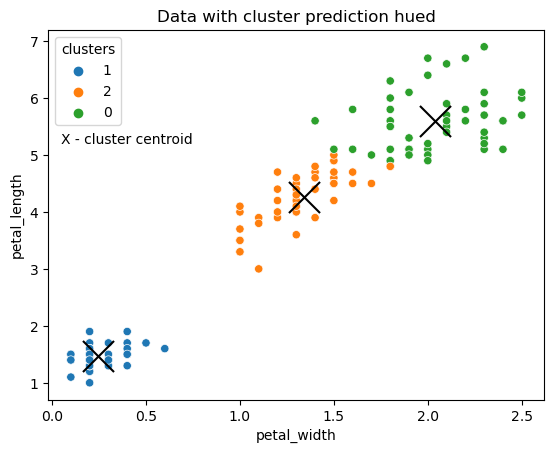

In [14]:
# visualize predictions with centroids marked
sns.scatterplot(x=X.petal_width, y=X.petal_length, hue=X.clusters)
plt.scatter(centroids.petal_width, centroids.petal_length, marker='x', c='black', s=500)
plt.title('Data with cluster prediction hued')
plt.text(x=.05, y=5.2, s='X - cluster centroid')
plt.show()

In [15]:
# visualize different values for k (n_clusters)
# first, get values of inertia_ for values of k ranging from 2-11
inertia_list = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['petal_width', 'petal_length']])
    inertia_list.append([k, kmeans.inertia_])

inertia_df = pd.DataFrame(inertia_list, columns=['n_clusters','inertia'])
inertia_df

,n_clusters,inertia
0,2,86.390220
1,3,31.371359
2,4,19.483001
3,5,13.916909
4,6,11.058167
5,7,9.281343
6,8,7.669666
7,9,6.622500
8,10,5.574285
9,11,5.270028


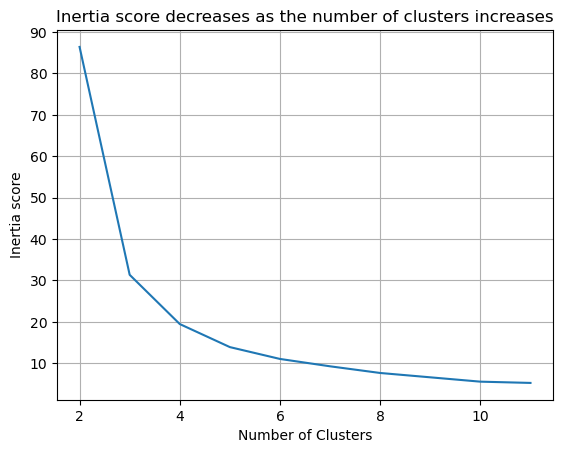

In [16]:
# now, visualize different values for k (n_clusters)
# looking for the "elbow": the point where adding additional clusters 
#   doesn't give us AS BIG of a reduction in inertia
plt.plot(inertia_df.n_clusters, inertia_df.inertia)
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia score')
plt.title('Inertia score decreases as the number of clusters increases')
plt.show()

In [17]:
# From 2 to 3: big drop; From 3 to 4 and 4 to 5, much smaller drop
#   SO: n_clusters = 3 looks good

In [18]:
# make a function to do all of this
def get_KMeans_inertia_scores(df, columns, max_n_clusters=10):
    """
    This function will
    - accept a dataframe, list of columns used to cluster, and a max value for number of clusters
    - make/fit/use a KMeans model
    - visualize number of clusters vs inertia
    - return dataframe with number of clusters and inertia scores
    """
    # initialize the dataframe we're going to send into KMeans
    X = df[columns]
    
    # initialize a list to capture number_of_clusters and inertia_
    inertia_list = []

    # fill up the inertia_list with data
    for k in range(2,max_n_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_list.append([k, kmeans.inertia_])
    
    # make the list into a dataframe
    inertia_df = pd.DataFrame(inertia_list, columns=['n_clusters','inertia'])

    # plot the data
    plt.plot(inertia_df.n_clusters, inertia_df.inertia)
    plt.grid()
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia score')
    plt.title(f'Inertia score with {columns}')
    plt.show()
    
    return 

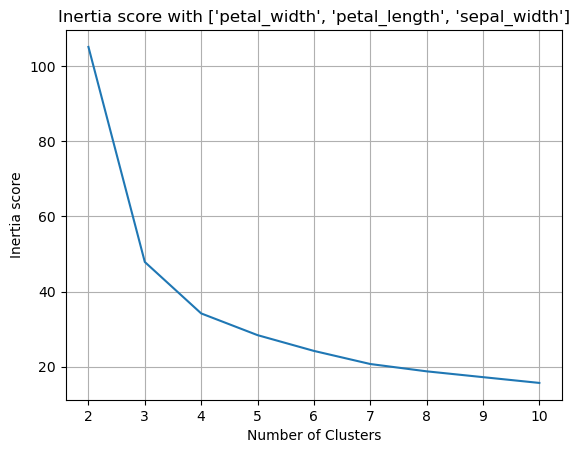

In [19]:
# using my function to repeat the clustering with 3 features
columns = ['petal_width', 'petal_length', 'sepal_width']
cf.get_KMeans_inertia_scores(df, columns)

In [20]:
# how would I visualize > 2 features in a scatterplot??
# - not sure, moving on

## Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [21]:
# defining a function to get mall_customers data from either a cached csv or the Codeup MySQL server
def get_mall_customer_data(sql_query= 'SELECT * FROM customers'
                    , db_name="mall_customers"):
    
    """
    This function will:
    -input 2 strings: sql_query, filename 
        default query selects all data from mall_customers database 
        default db_name is "mall_customers"
    - check the current directory for db_name.csv existence
      - return df from that filename if it exists
    - If csv doesn't exist:
      - create a df of the sql_query
      - write df to csv
      - return that df
    """
    filename = db_name + '.csv'
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        print ("csv file found and read")
        return df
    else:
        url = w.get_db_url(db_name)
        
        df = pd.read_sql(sql_query, url)
        df.to_csv(filename, index=False)
        print ("csv file not found, data read from sql query, csv created")
        return df


In [22]:
df = get_mall_customer_data()

csv file found and read


In [23]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


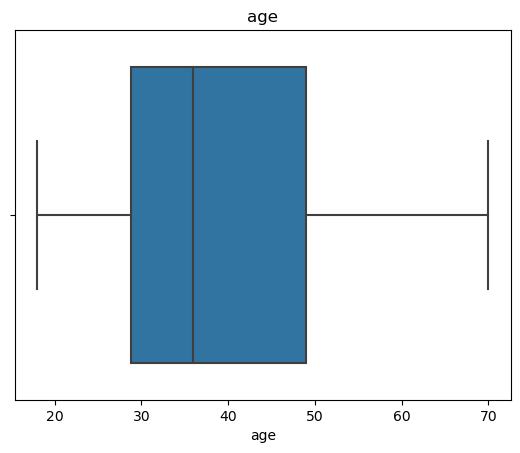

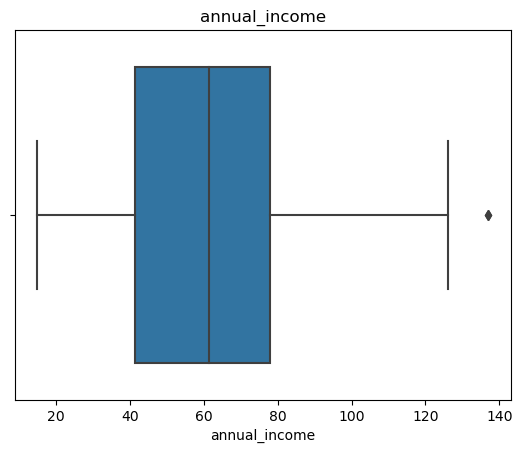

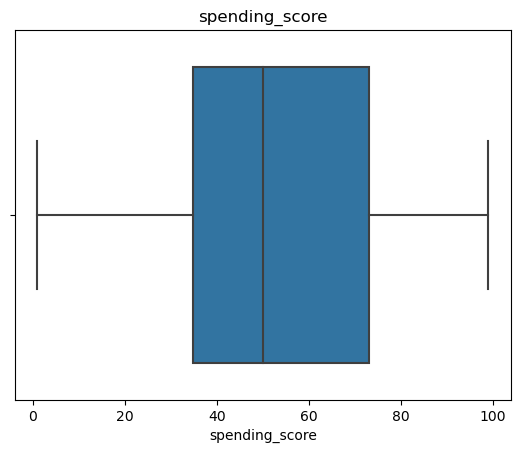

In [25]:
plot_cols = ['age', 'annual_income', 'spending_score']
for col in plot_cols:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [26]:
# dropping customer_id
df = df.drop(columns=['customer_id'])

In [27]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [28]:
# one outlier; leaving it for now
# i'll drop customer_id, encode gender, split it and scale the data
dummy_df = pd.get_dummies(df['gender'], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

In [29]:
df.head()

,gender,age,annual_income,spending_score,Male
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [30]:
# I can't remember, so I'll say the target is spending_score
train, validate, test = w.split_function(df)

Prepared df: (200, 5)

Train: (120, 5)
Validate: (40, 5)
Test: (40, 5)


In [31]:
train.head()

,gender,age,annual_income,spending_score,Male
42,Male,48,39,36,1
157,Female,30,78,78,0
155,Female,27,78,89,0
3,Female,23,16,77,0
99,Male,20,61,49,1


In [32]:
# split into X and y
X_columns = ['age', 'annual_income', 'gender', 'Male']
X_train = train[X_columns]
X_validate = validate[X_columns]
X_test = test[X_columns]

y_train = train.spending_score
y_validate = validate.spending_score
y_test = test.spending_score

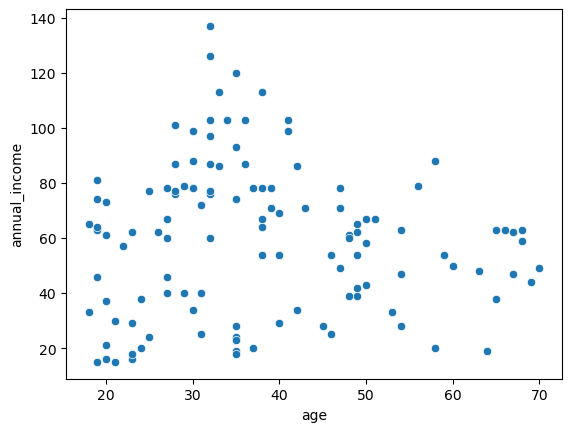

In [33]:
# visualize age and annual_income
sns.scatterplot(X_train.age, X_train.annual_income)
plt.show()

In [34]:
# make/fit/use KMeans (starting with just two columns)
columns = ['age', 'annual_income']
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train[columns])

KMeans(n_clusters=3, random_state=42)

In [35]:
X_train['clusters'] = kmeans.predict(X_train[columns])
X_train.head()

,age,annual_income,gender,Male,clusters
42,48,39,Male,1,0
157,30,78,Female,0,1
155,27,78,Female,0,1
3,23,16,Female,0,2
99,20,61,Male,1,1


In [36]:
# put the above into a dataframe for fun / readability
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['age', 'annual_income'])
centroids

,age,annual_income
0,55.468750,53.562500
1,32.509091,82.472727
2,31.393939,27.212121


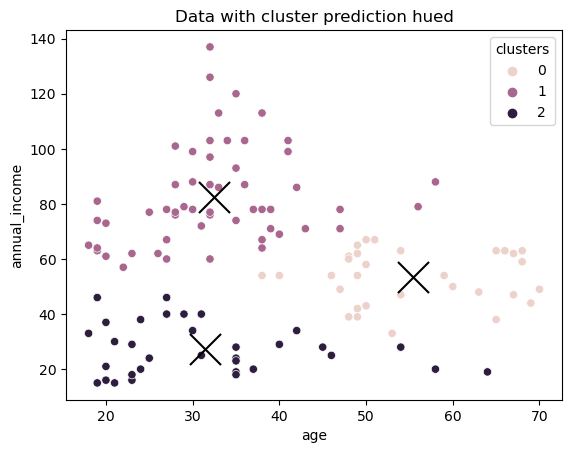

In [37]:
# visualize age and annual_income and predictions hued, with centroid marked
sns.scatterplot(X_train.age, X_train.annual_income, hue=X_train.clusters)
plt.scatter(centroids.age, centroids.annual_income, marker='x', c='black', s=500)
plt.title('Data with cluster prediction hued')
plt.show()


In [38]:
X_train = X_train.drop(columns=['clusters'])
X_train.head()

,age,annual_income,gender,Male
42,48,39,Male,1
157,30,78,Female,0
155,27,78,Female,0
3,23,16,Female,0
99,20,61,Male,1


In [39]:
# let's scale the data and try again
to_scale = ['age', 'annual_income', 'Male']
X_train_scaled = X_train[to_scale]
X_validate_scaled = X_validate[to_scale]
X_test_scaled = X_test[to_scale]

X_train_scaled, X_validate_scaled, X_test_scaled = w.get_minmax_scaled (X_train_scaled
                                                                        , X_validate_scaled
                                                                        , X_test_scaled, to_scale)
X_train_scaled.head()

,age,annual_income,Male
42,0.576923,0.196721,1.0
157,0.230769,0.516393,0.0
155,0.173077,0.516393,0.0
3,0.096154,0.008197,0.0
99,0.038462,0.377049,1.0


In [40]:
X_train.head()

,age,annual_income,gender,Male
42,48,39,Male,1
157,30,78,Female,0
155,27,78,Female,0
3,23,16,Female,0
99,20,61,Male,1


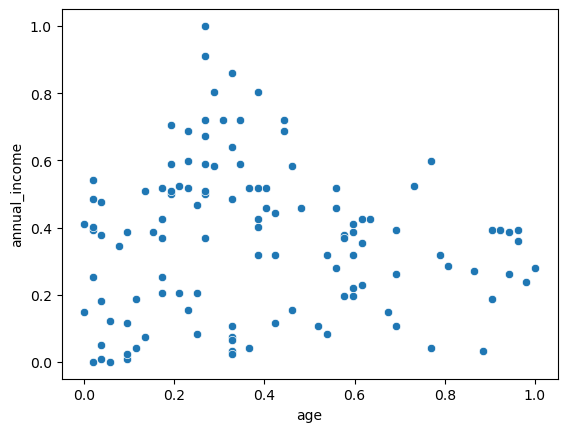

In [41]:
# visualize age and annual_income
sns.scatterplot(X_train_scaled.age, X_train_scaled.annual_income)
plt.show()

In [42]:
# make/fit/use KMeans (starting with just two columns) (
columns = ['age', 'annual_income']
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled[columns])

KMeans(n_clusters=3, random_state=42)

In [43]:
X_train_scaled['clusters'] = kmeans.predict(X_train_scaled[columns])
X_train_scaled.head()

,age,annual_income,Male,clusters
42,0.576923,0.196721,1.0,0
157,0.230769,0.516393,0.0,1
155,0.173077,0.516393,0.0,1
3,0.096154,0.008197,0.0,2
99,0.038462,0.377049,1.0,2


In [44]:
# put the above into a dataframe for fun / readability
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['age', 'annual_income'])
centroids

,age,annual_income
0,0.711069,0.302879
1,0.282648,0.587305
2,0.155449,0.171220


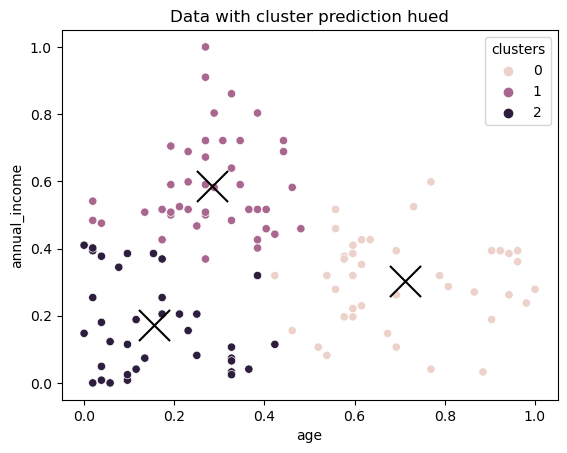

In [45]:
# visualize age and annual_income and predictions hued, with centroid marked
sns.scatterplot(X_train_scaled.age, X_train_scaled.annual_income, hue=X_train_scaled.clusters)
plt.scatter(centroids.age, centroids.annual_income, marker='x', c='black', s=500)
plt.title('Data with cluster prediction hued')
plt.show()

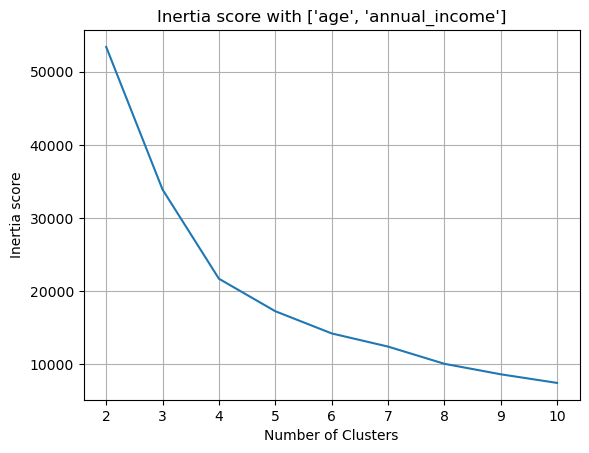

In [46]:
# let's look at the KMeans inertia scores on unscaled first
columns = ['age', 'annual_income']
cf.get_KMeans_inertia_scores(X_train, columns)

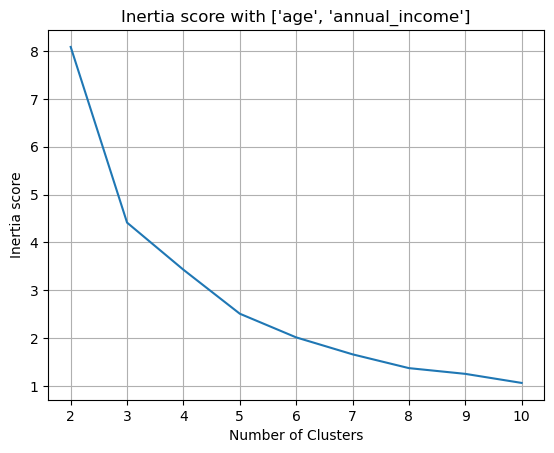

In [47]:
# let's look at the KMeans inertia scores on scaled
columns = ['age', 'annual_income']
cf.get_KMeans_inertia_scores(X_train_scaled, columns)

In [48]:
# make/fit/use KMeans -- tried 2 and 3 columns
columns = ['age', 'annual_income']
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train[columns])

KMeans(n_clusters=3, random_state=42)

In [49]:
X_train['clusters'] = kmeans.predict(X_train[columns])
X_train.head()

,age,annual_income,gender,Male,clusters
42,48,39,Male,1,0
157,30,78,Female,0,1
155,27,78,Female,0,1
3,23,16,Female,0,2
99,20,61,Male,1,1


In [50]:
# put the above into a dataframe for fun / readability
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centroids

,age,annual_income
0,55.468750,53.562500
1,32.509091,82.472727
2,31.393939,27.212121


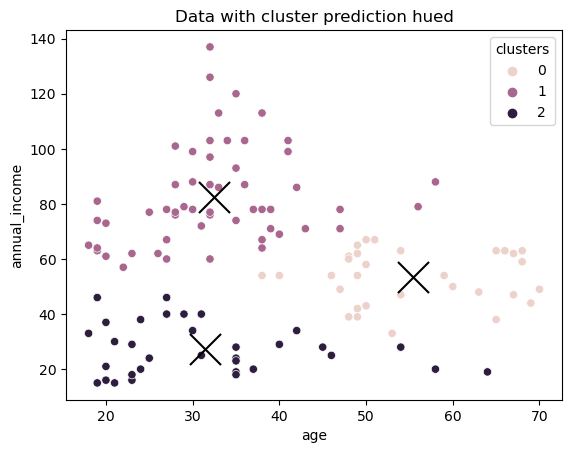

In [51]:
# visualize age and annual_income and predictions hued, with centroid marked
sns.scatterplot(X_train.age, X_train.annual_income, hue=X_train.clusters)
plt.scatter(centroids.age, centroids.annual_income, marker='x', c='black', s=500)
plt.title('Data with cluster prediction hued')
plt.show()


In [52]:
X_train_scaled.head()

,age,annual_income,Male,clusters
42,0.576923,0.196721,1.0,0
157,0.230769,0.516393,0.0,1
155,0.173077,0.516393,0.0,1
3,0.096154,0.008197,0.0,2
99,0.038462,0.377049,1.0,2


In [53]:
# now on scaled data
# make/fit/use KMeans -- tried 2 and 3 columns
columns = ['age', 'annual_income']
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled[columns])

KMeans(n_clusters=3, random_state=42)

In [54]:
X_train_scaled['clusters'] = kmeans.predict(X_train_scaled[columns])
X_train_scaled.head()

,age,annual_income,Male,clusters
42,0.576923,0.196721,1.0,0
157,0.230769,0.516393,0.0,1
155,0.173077,0.516393,0.0,1
3,0.096154,0.008197,0.0,2
99,0.038462,0.377049,1.0,2


In [55]:
# put the above into a dataframe for fun / readability
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centroids

,age,annual_income
0,0.711069,0.302879
1,0.282648,0.587305
2,0.155449,0.171220


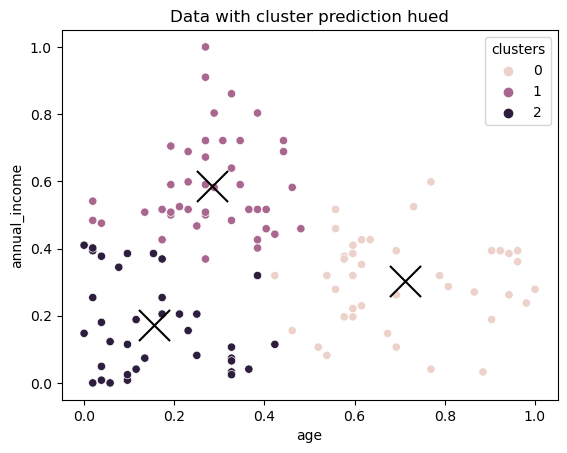

In [56]:
# visualize age and annual_income and predictions hued, with centroid marked
sns.scatterplot(X_train_scaled.age, X_train_scaled.annual_income, hue=X_train_scaled.clusters)
plt.scatter(centroids.age, centroids.annual_income, marker='x', c='black', s=500)
plt.title('Data with cluster prediction hued')
plt.show()


In [57]:
# this one looks the best. it had 2 columns: age and annual_income and n_clusters = 3

# Bonus
- Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- Visualize the data and guess the number and shape of the clusters.
- Implement the KMeans algorithm on unscaled data and visualize the clusters.
- Repeat the step above but with scaled data.
- Write down the takeaways from this exercise.

In [58]:
def get_csv_export_url(g_sheet_url):
    '''
    This function will
    - take in a string that is a url of a google sheet
      of the form "https://docs.google.com ... /edit#gid=12345..."
    - return a string that can be used with pd.read_csv
    '''
    csv_url = g_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    return csv_url

In [59]:
g_sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'
url = get_csv_export_url(g_sheet_url)
url

'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&gid=0'

In [60]:
df = pd.read_csv(url)

In [61]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [62]:
df.shape

(800, 2)

In [63]:
sns.scatterplot(df.x, df.y)

<AxesSubplot:xlabel='x', ylabel='y'>

In [64]:
def get_cluster_plot(df, x_col, y_col, cluster_col, centroids):
    """
    This function will
    - accept a dataframe with at least 3 columns: x_col, y_col, cluster_col
    - accept a centroids dataframe that has the centroid point for each cluster (0,1,...)
      in cluster_col
    - make a scatter plot with hue=cluster_col
    """
    
    sns.scatterplot(df[x_col], df[y_col], hue=df[cluster_col])
    plt.scatter(centroids[x_col], centroids[y_col], marker='x', c='black', s=500)
    plt.title('Data with cluster prediction hued')
    plt.show()
    return

In [65]:
def get_multiple_KMeans_cluster_plots(df, columns, x_col, y_col, max_n_clusters=4):
    """
    This function will
    - accept a dataframe, list of columns used to cluster, and a max value for number of clusters
    - make/fit/use several KMeans model with n_clusters varying from 2 to max_n_clusters
    - visualize with get_cluster_plots
    """    
    # initialize the dataframe we're going to send into KMeans
    X = df[columns]
    
    # fill up the inertia_list with data
    for k in range(2,max_n_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X[columns])
        X['clusters'] = kmeans.predict(X[columns])
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[x_col, y_col])
        get_cluster_plot(X, x_col, y_col, 'clusters', centroids)
        
    return

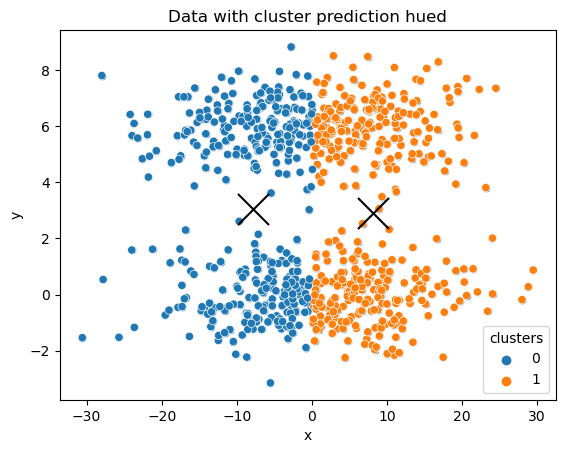

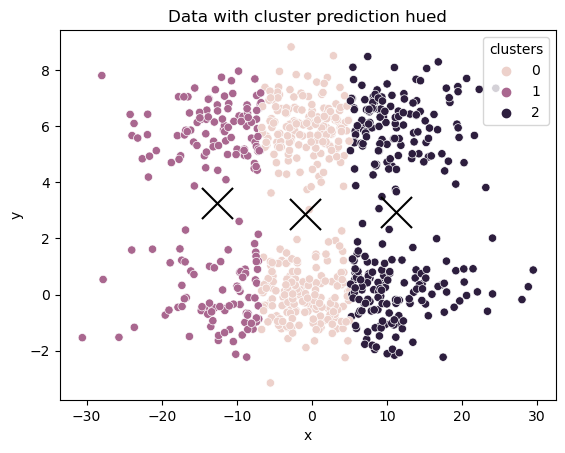

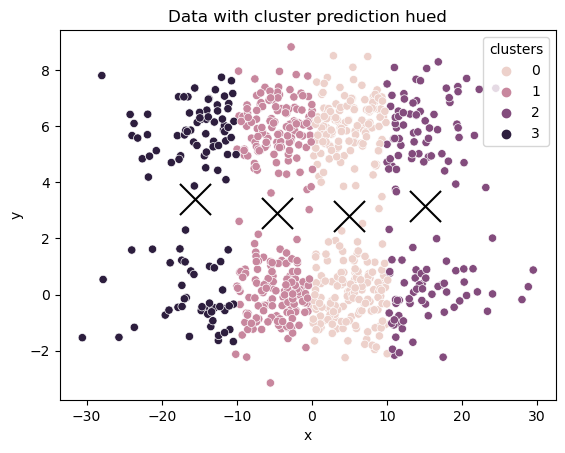

In [66]:
columns = ['x', 'y']
cf.get_multiple_KMeans_cluster_plots(df, columns, 'x', 'y', 4)

In [67]:
# that was ridiculous. trying again with scaled data
df_scaled, x2, x3 = w.get_minmax_scaled(df, df, df, ['x','y'])

In [68]:
df_scaled.head()

,x,y
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807


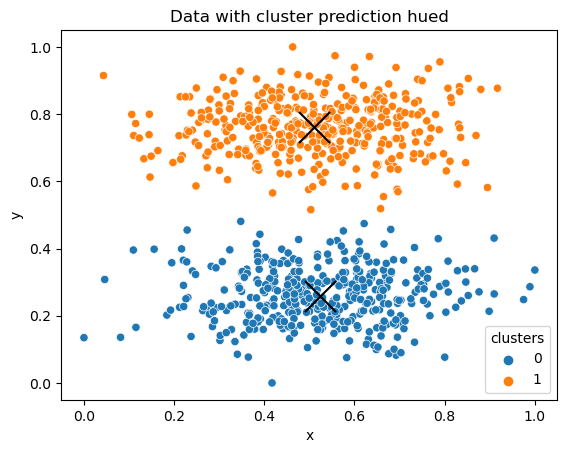

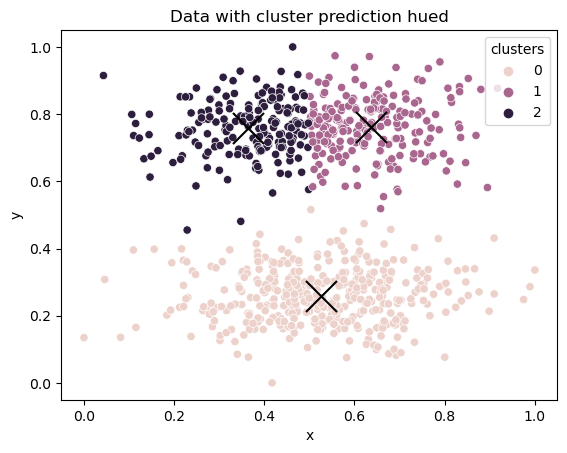

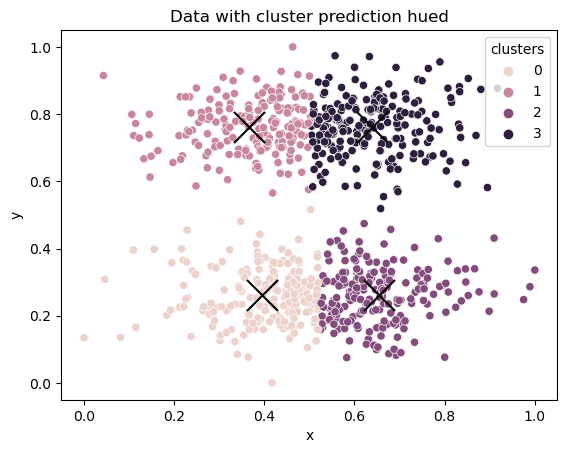

In [69]:
cf.get_multiple_KMeans_cluster_plots(df_scaled, columns, 'x', 'y', 4)

In [70]:
## CLEARLY SCALING IS IMPORTANT!

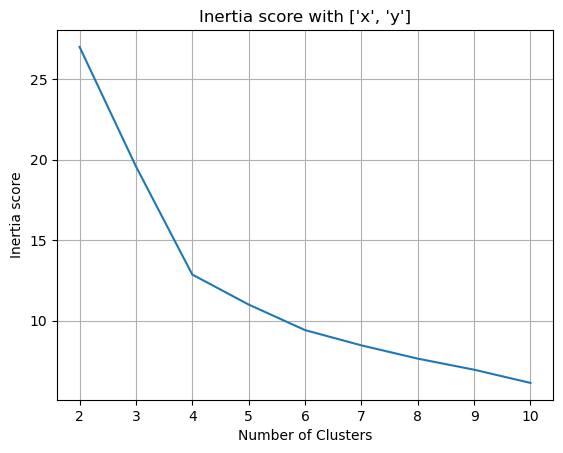

In [71]:
cf.get_KMeans_inertia_scores(df_scaled, ['x', 'y'])